In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import sklearn.preprocessing 
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import missingno
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns

# Plan: use an advanced regression technique 
## Stepwise regression, it is one of the method to handle higher dimensionality of data set.
Some of the most commonly used Stepwise regression methods are listed below:

* Standard stepwise regression does two things. It adds and removes predictors as needed for each step.
* Forward selection starts with most significant predictor in the model and adds variable for each step.
* Backward elimination starts with all predictors in the model and removes the least significant variable for each step.

helps determine which factors are important and which are not. Certain variables have a rather high p-value and were not meaningfully contributing to the accuracy of our prediction. From there, only important factors are kept to ensure that the linear model does its prediction based on factors that can help it produce the most accurate result.

In [3]:
data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


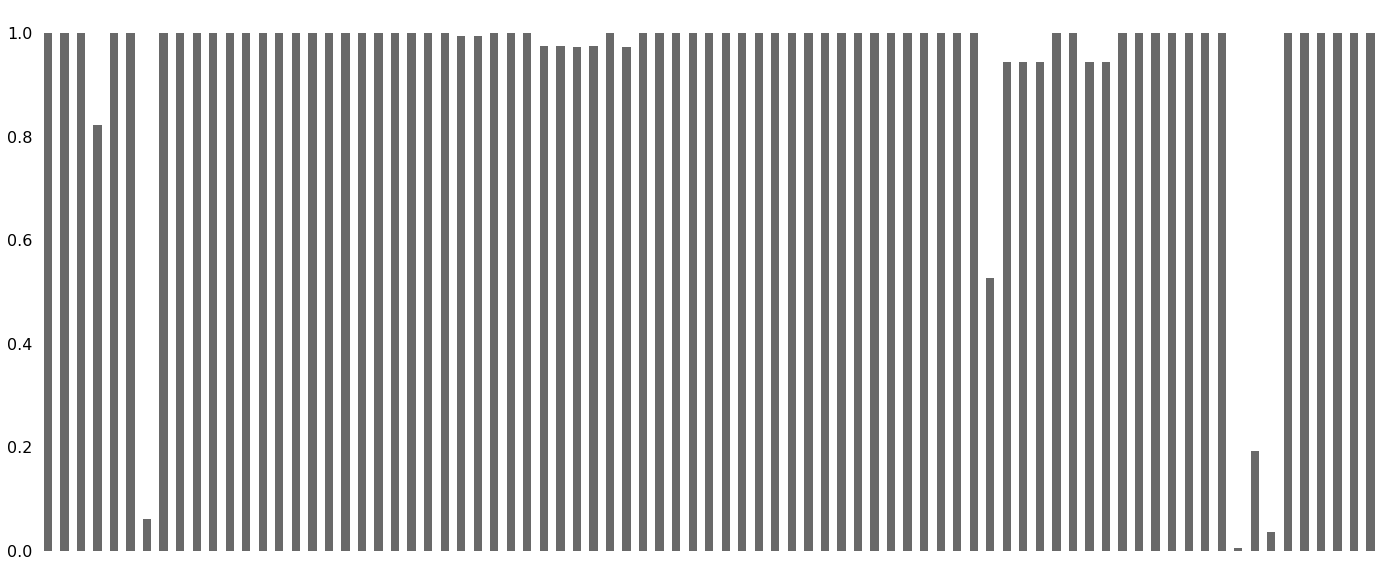

In [4]:
missingno.bar(data)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

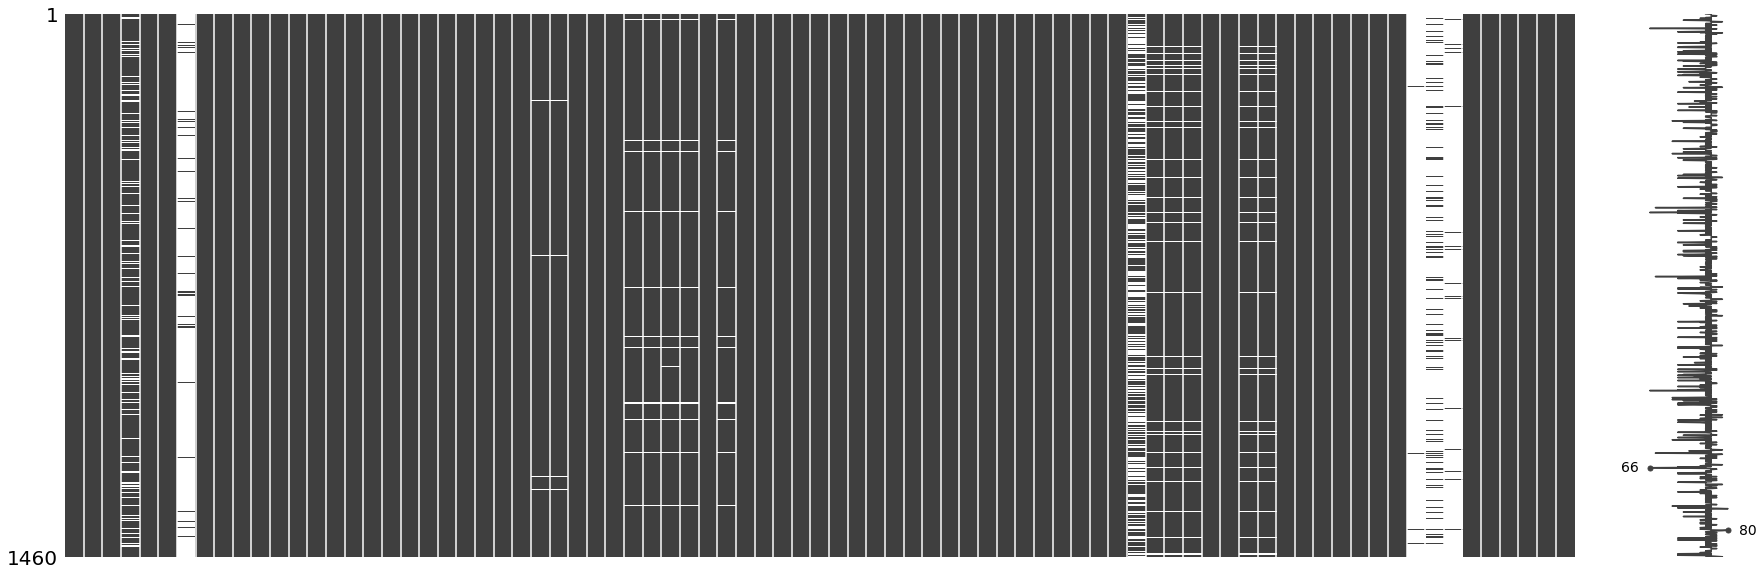

In [6]:
missingno.matrix(data, figsize = (30,10))

In [7]:
# Drop 0 variance cols: Id
# and features with a lot of missing values 
data.drop(columns=['Alley','Fence','PoolQC','MiscFeature','FireplaceQu','Id'], inplace=True)

x_columns  =  train_set.columns

## creating function to get model statistics
import numpy as np
import statsmodels.api as sm
def get_stats():
    x = train_set[x_columns]
    results = sm.OLS(y, x.astype(float)).fit()
    print(results.summary())
    return results.summary()
stats =  get_stats()

rawCols = 'YearRemodAdd    BsmtFinSF1     BsmtUnfSF     TotalBsmtSF    LowQualFinSF BsmtHalfBath    FullBath       HalfBath       GarageYrBlt    GarageArea      OpenPorchSF    EnclosedPorch   3SsnPorch       PoolArea       MiscVal  Utilities LotConfig       Condition1 MoSold         Condition2    BldgType      HouseStyle     Exterior1st  Exterior2nd     Foundation     BsmtFinType1   BsmtFinType1    CentralAir     Electrical      GarageFinish   GarageQual     PavedDrive     SaleType      '
newCols=[e for e in rawCols.split(" ") if e !=""]
train_set[newCols]

Coefficients having p-values less than alpha are statistically significant. For example, if you chose alpha to be 0.05, coefficients having a p-value of 0.05 or less would be statistically significant (i.e., you can reject the null hypothesis and say that the coefficient is significantly different from 0).”

# Exploring data

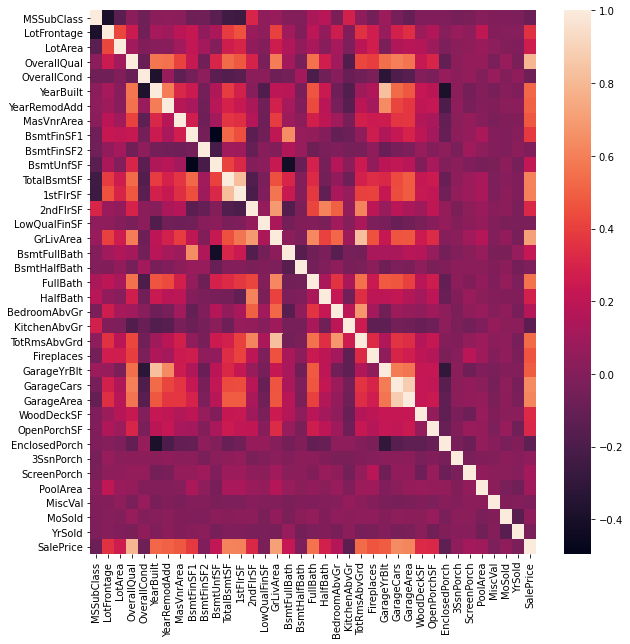

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr());

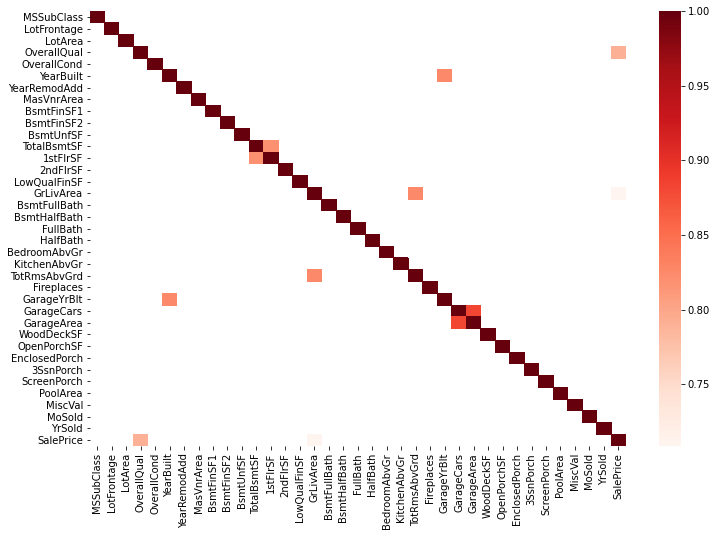

In [9]:
corr = data.corr()
kot = corr[np.abs(corr)>=0.7]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Reds")

In [10]:
## Drop correlated features
data.drop(columns=['GarageArea','GrLivArea','GarageYrBlt'], inplace=True)

In [14]:
## remove NaN values 
data.dropna(how='any', inplace=True)

In [16]:
y = data.SalePrice
data.drop(columns=['SalePrice'], inplace=True)

In [138]:
def get_num_cat_features(type_features, data):
    return data.select_dtypes(include=type_features)

## Get the numerical features
numerics = ['int64','float64']
newdf_num = get_num_cat_features(numerics, data)

## Get the categorical features
newdf_cat = data.select_dtypes(['object'])


All values are nominal, Label encoder will be used

****Ordinal Encoder**** /
***hidden***

In [139]:
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

## Get the categorical features
test.drop(columns=['Id','Alley','Fence','PoolQC','MiscFeature','FireplaceQu'], inplace= True)
test.drop(columns=['GarageArea','GrLivArea','GarageYrBlt'], inplace=True)
test.fillna(test.mean())
#test.dropna(inplace= True)

## Get the numerical features
numericstest = ['int64','float64']
newdf_numtest = get_num_cat_features(numerics, test)

test_num = get_num_cat_features(numerics, test)

newdf_cattest = test.select_dtypes(['object'])

trainTest = newdf_cat.append(newdf_cattest)

In [140]:
newdf_cattest.shape

(1459, 38)

In [141]:
## First test of encoding labels:
def encode_labels(data):
    encoded_categoric_train_set = data.copy()
    
    for c in data.columns:
        data[c]= data[c].astype('category')
        encoded_categoric_train_set[c] = data[c].cat.codes
    return encoded_categoric_train_set

encoded_categoric_train_set = encode_labels(trainTest)

newdf_cat = encoded_categoric_train_set[:1094]
test = encoded_categoric_train_set[1094:]


In [38]:
scaler = sklearn.preprocessing.StandardScaler()
scaled_numeric_train_set = scaler.fit_transform(newdf_num)

In [40]:
numeric_train_set_df = pd.DataFrame(scaled_numeric_train_set, columns=newdf_num.columns)
## Merge numercial and catgorical data
train_set = pd.DataFrame(pd.merge(numeric_train_set_df,
                 encoded_categoric_train_set[encoded_categoric_train_set.columns], on= numeric_train_set_df.index))
train_set= train_set.drop(columns=['key_0'])

In [123]:
clf = RandomForestRegressor(max_features='auto', n_estimators=200, random_state=42, bootstrap=False)
scores=cross_val_score(clf, train_set, y, cv=5)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
clf.fit(train_set,y)

0.75 accuracy with a standard deviation of 0.03


## CHECK FOR OVERFITTING HERE

In [ ]:
param_grid = { "criterion":["mse"],
              "max_depth":[20],
               'min_samples_split': [10],}

base_estimator = RandomForestRegressor(random_state=0)
sh = GridSearchCV(base_estimator, param_grid, "r2", cv=5).fit(train_set, y)
sh.best_estimator_

In [ ]:
sh.best_params_

In [ ]:
sh.best_score_

In [ ]:

reg=GradientBoostingRegressor(random_state =0)

param_grid
shg = GridSearchCV(reg, param_grid, "r2", cv=5).fit(train_set, y)
shg.best_estimator_

In [144]:
#encoded_categoric_test_set_trs =  categoric_test_set.apply(enc.transform) 
encoded_categoric_test_set = test


scaled_numeric_test_set = scaler.transform(test_num[newdf_num.columns])

numeric_test_set_df = pd.DataFrame(scaled_numeric_test_set, columns=newdf_num.columns)
## Merge numercial and catgorical data
test_set = pd.DataFrame(pd.merge(numeric_test_set_df,
                 test[test.columns], on= numeric_test_set_df.index))
test_set.drop(columns=['key_0'], inplace=True)
test_set.fillna(test_set.mean(), inplace=True)

In [150]:

y_predict = clf.predict(test_set)

In [151]:
sample_submission = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

output = pd.DataFrame({'Id': sample_submission.Id,
'SalePrice': y_predict})
output.to_csv('submissionGB.csv', index=False)